# 3.3.2 最急降下法と非線形共役勾配法の挙動の比較

In [1]:
import numpy as np

### コード3.4 Rosenbrock 関数の目的関数値を勾配を計算する関数

In [2]:
def func_rosen(x): # 目的関数値を返す関数
    return (x[0]-1)**2 + 100*(x[0]**2-x[1])**2
def grad_rosen(x): # 勾配を返す関数
    return np.array([
        400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2,
                     -200*(x[0]**2-x[1])])

In [3]:
from code3_1v2 import * # 最急降下法（点列のログを残すバージョン）のコードを読み込み
from code3_2v2 import * # 非線形共役勾配法（点列のログを残すバージョン）のコードを読み込み

### コード3.5: 最急降下法と非線形共役勾配法の挙動

SD, iter: 1000 f(x): 0.0017167182857613253
CG(HS), iter: 65 f(x): 9.996007676050378e-20


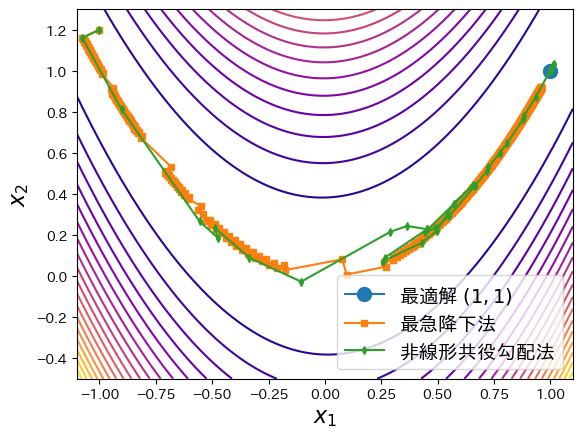

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt # 図のプロットに必要なライブラリ
import japanize_matplotlib # 図に日本語を使用するためのライブラリ

# Rosenbrock 関数の等高線をプロットするためのコード
X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 100), np.linspace(-0.5, 1.3, 100))
Z = np.array([[func_rosen(np.array([x, y])) for x, y in zip(vx, vy)] for vx, vy in zip(X, Y)])
plt.contour(X, Y, Z, cmap='plasma', levels=np.linspace(np.min(Z), np.max(Z), 20))

# 最急降下法と非線形共役勾配法の適用
x_0 = np.array([-1, 1.2]) # 初期点は x_0 = (-1, 1)^T
sequenceSD = SteepestDescent(func_rosen, grad_rosen, x_0)
sequenceCG = CG_HS(func_rosen, grad_rosen, x_0)

# Rosenbrock 関数の等高線に各点列をプロットするためのコード
plt.plot(1,1, marker='o', markersize=10, label='最適解 $(1,1)$')
plt.plot(sequenceSD[:, 0], sequenceSD[:, 1], marker='s' , markersize=4, label='最急降下法')
plt.plot(sequenceCG[:, 0], sequenceCG[:, 1], marker='d', markersize=4, label='非線形共役勾配法')
plt.legend(fontsize=14)
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.show()